In [1]:
import networkx as nx
import random
import pandas as pd


df = pd.read_csv('data/batch_task.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,M1,1.0,j_1,1,Terminated,419912,419912,100.0,0.20
1,R2_1,1.0,j_2,1,Terminated,87076,87086,50.0,0.20
2,M1,1.0,j_2,1,Terminated,87076,87083,50.0,0.20
3,R6_3,371.0,j_3,1,Terminated,157297,157325,100.0,0.49
4,J4_2_3,1111.0,j_3,1,Terminated,157329,157376,100.0,0.59
...,...,...,...,...,...,...,...,...,...
14295726,M3,1.0,j_4201003,1,Terminated,149574,149575,100.0,0.30
14295727,M2,1.0,j_4201003,1,Terminated,149574,149575,100.0,0.30
14295728,M1,1.0,j_4201005,1,Terminated,605611,605611,100.0,0.20
14295729,M1,1.0,j_4201007,1,Terminated,171940,171943,50.0,0.30


In [2]:
G = nx.DiGraph()

seen = set()
for i, entry in enumerate(df[0]):
    if entry != "MergeTask" and (entry[0] == "M" or entry[0] == "R") and entry not in seen:
        
        seen.add(entry)
        lst = entry[1:].split("_")
        
        child = lst[0]
        
        if not G.has_node(child):
            G.add_node(child)
        
        for i in range(1, len(lst)):
            parent = lst[i]
            
            if not G.has_node(parent):
                G.add_node(parent)
                
            if not G.has_edge(parent, child):
                G.add_edge(parent, child)
                
            if not nx.is_directed_acyclic_graph(G):
                G.remove_edge(parent, child) 
        
    else:
        continue

In [3]:
pos=nx.circular_layout(G)

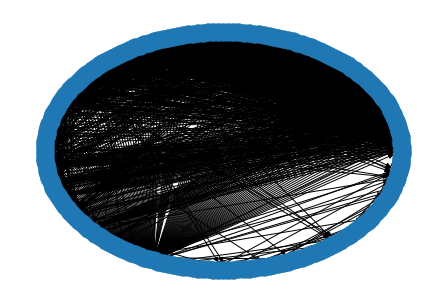

In [4]:
pos=nx.circular_layout(G)
nx.draw(G, pos, nodecolor='y',edge_color='k')
nx.is_directed_acyclic_graph(G)

In [5]:
nx.is_directed_acyclic_graph(G)

True

In [6]:
G.nodes

NodeView(('1', '2', '6', '3', '9', '8', '5', '4', '7', '16', '15', '10', '14', '11', '13', '17', '12', '18', '26', '25', '22', '19', '21', '20', '27', '23', '24', '36', '39', '31', '30', '29', '28', '38', '37', '32', '47', '46', '35', '34', '33', '45', '40', '42', '43', '41', '44', '48', '51', '53', '56', '52', '54', '55', '49', '', 'Stg4', 'Stg3', '50', '57', '61', '62', '58', '59', '60', 'Stg8', 'Stg9', '82', '81', '78', '77', '75', '63', '76', '69', '67', '74', '84', '83', '65', '80', '79', '70', '64', '71', '73', '72', '68', '87', '86', '66', '85', '124', '93', '92', '101', '100', '113', '112', '104', '121', '120', '127', '126', '105', '116', '107', '106', '125', '89', '88', '108', '99', '98', '109', '95', '94', '97', '96', '103', '102', '115', '114', '123', '122', '119', '118', '111', '110', '91', '90', '117', 'Stg17', 'Stg1', 'Stg10', '134', 'Stg19', 'Stg2', 'Stg16', 'Stg11', 'Stg7', 'Stg15', 'Stg5', 'Stg18', 'Stg13', '195', '194', '144', '168', '167', '159', '132', '131', '184',